# [Applied Statistics](https://lamastex.github.io/scalable-data-science/as/2019/)
## 1MS926, Spring 2019, Uppsala University 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 12. Linear Regression

- Regression 
  - linear models and their least-squares estimators
  - assessing fit using diagnostic plots

- Introduction to R in SageMath Jupyter IPython Notebook - SageMath/R


# Introduction
**Regression** is a method for studying the relationship between a **response variable** $Y$ and a **covariate** $X$. 
The covariate is also called a **feature** or a **predictor** variable.

A simple way to summarise the relationship between $X$ and $Y$ is through the regression function $r(x)$:

$$
r(x) = E(Y | X=x) = \int y \, f(y|x) dy
$$

Our objective is to estimate the regression function $r(x)$ from data of the form:

$$
(Y_1,X_1),(Y_2,X_2),\ldots,(Y_n,X_n) \overset{IID}{\sim} F_{X,Y}
$$

We assume that $F_{X,Y}$, the joint distribution of $X$ and $Y$, is parametric and $r$ is linear.

# Simple Linear Regression

The **simple linear regression model** is when $X_i$ is real-valued (one-dimensional) and $r(x)$ is assumed to be linear:

$$
r(x) = \beta_0 + \beta_1 x, \qquad \text{and } \quad V(Y | X=x)=\sigma^2 \, \text{ is independent of } x
$$

Thus simple linear regression model is the following:

$$
\boxed{
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i, \qquad \text{ where, } \quad E(\epsilon_i | X_i)=0 \text{ and } V(\epsilon_i | X_i)=\sigma^2
}
$$

The unknown parameters and their estimates in the model are:

- the intercept $\beta_0$ and its estimate $\widehat{\beta}_0$,
- the slope $\beta_1$ and its estimate $\widehat{\beta}_1$ and
- the variance $\sigma^2$ and its estimate $\widehat{\sigma}^2$

The **fitted line** is:
$$
\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x
$$

The **fitted or predicted values** are:
$$
\widehat{Y}_i = \widehat{r}(X_i) 
$$

The **residuals** are:
$$
\widehat{\epsilon}_i = Y_i-\widehat{Y}_i=Y_i-\left(\widehat{\beta}_0 + \widehat{\beta}_1 X_i\right)
$$

The **residual sum of squares** or **RSS**, that measures how well the line fits the data, is defined by
$$
RSS = \sum_{i=1}^n \widehat{\epsilon}_i^2
$$

The **least squares estimates** are the values $\widehat{\beta}_0$ and $\widehat{\beta}_1$ that minimise $RSS$ and they are given by:

$$
\boxed{
\widehat{\beta}_1 = \displaystyle{\frac{\sum_{i=1}^n(X_i-\overline{X}_n)(Y_i-\overline{Y}_n)}{\sum_{i=1}^n(X_i-\overline{X}_n)^2}}
\, , \qquad
\widehat{\beta}_0 = \displaystyle{\overline{Y}_n - \widehat{\beta}_1 \overline{X}_n}
\, , \qquad 
\widehat{\sigma}^2 = \displaystyle{\left(\frac{1}{n-2}\right) \sum_{i=1}^n \widehat{\epsilon}_i^2}
}
$$

## Interactive Animations for Regression

Check out:
- [http://setosa.io/ev/ordinary-least-squares-regression/](http://setosa.io/ev/ordinary-least-squares-regression/)

# Implementing Simple Linear Regression from Scratch

Using the above formulas we can implement Python functions to calculate the **least squares estimates**,
$\widehat{\beta}_0$ and $\widehat{\beta}_1$, that minimise $RSS$.

In [117]:
import numpy as np 
import matplotlib.pyplot as plt

def estimate_coefficients(x, y): 
    # size of the dataset  
    n = np.size(x) 
    # mean of x and y
    mean_x, mean_y = np.mean(x), np.mean(y) 
    # xy cross-deviation and xx deviation
    SS_xy = np.sum(y*x - n*mean_y*mean_x) 
    SS_xx = np.sum(x*x - n*mean_x*mean_x)  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = mean_y - b_1*mean_x 
    return(b_0, b_1)

def plot_regression_line(x, y, b): 
    # plotting the data points on a graph
    plt.scatter(x, y, color = "m",marker = "o", s = 10) 
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    # plotting the fitted regression line
    plt.plot(x, y_pred, color = "b")
    # putting generic labels for x and y axis
    plt.xlabel('x') 
    plt.ylabel('y') 
    # function to show plotted graph
    plt.show()

def SimpleLinearRegression(x,y): 
    # estimating coefficients 
    b = estimate_coefficients(x, y) 
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1])) 
    # plotting fitted regression line  with data
    plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = -0.000193932215061 
b_1 = 0.00526687127757


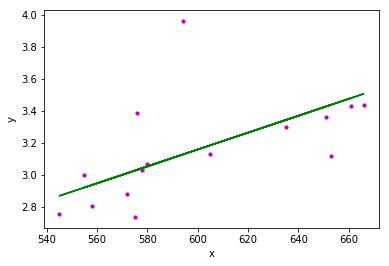

In [17]:
# Datasets for x and y 
LSAT=np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594]) # LSAT data
GPA=np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96]) # GPA data

SimpleLinearRegression(LSAT,GPA)

We can look at the residuals of the fitted line as follows.

Text(0,0.5,'$\\epsilon_i$')

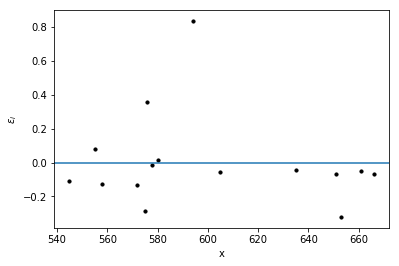

In [121]:
predictedGPA = -0.000193932215061 + 0.00526687127757*LSAT
residuals = GPA - predictedGPA
plt.scatter(LSAT, residuals, color = "k",marker = "o", s = 10) 
plt.axhline()
# putting generic labels for x and y axis
plt.xlabel('LSAT') # draw a y=0 line
plt.ylabel('$\epsilon_i$') # in general we want residuals to be Normally distributes about 0 with the same variance

## Solving Least Squares Using Numerical Linear Algebra Routine in scipy

We can use [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq) to get the least squares solution to our regression problems quite easily, including generalisation to multiple linear regression when the covariates are in more than 1 dimension.

Let us try to understand the code in the previous cell by learning how to do a least squares fit by setting up the right design matrix.

In [26]:
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import numpy as np

# suppose we have the following data
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

#We want to fit a line of the form y = a + b*x to this data. We first form the 
#“design matrix” M, with a constant column of 1s and a column containing x
M1 = x[:, np.newaxis]^[0, 1]
M1

array([[ 1. ,  1. ],
       [ 1. ,  2.5],
       [ 1. ,  3.5],
       [ 1. ,  4. ],
       [ 1. ,  5. ],
       [ 1. ,  7. ],
       [ 1. ,  8.5]])

In [30]:
#We want to find the least-squares solution to 
#M1.dot(p) = y, where p is a vector with length 2 that holds the parameters a and b.
p, res, rnk, s = lstsq(M1, y)
p

array([-1.93080357,  1.16875   ])

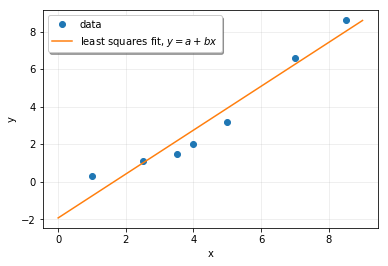

In [33]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx
plt.plot(xx, yy, label='least squares fit, $y = a + bx$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

### Fitting a Quadratic is also Simple Linear Regresssion
Suppose we want to fit a quadratic polynomial of the form $y = a + b*x^2$ to the same data. 
Then we first form the design matrix `M2`, with a constant column of `1`s and a column containing `x^2` as follows:

In [35]:
M2 = x[:, np.newaxis]^[0, 2]
M2

array([[  1.  ,   1.  ],
       [  1.  ,   6.25],
       [  1.  ,  12.25],
       [  1.  ,  16.  ],
       [  1.  ,  25.  ],
       [  1.  ,  49.  ],
       [  1.  ,  72.25]])

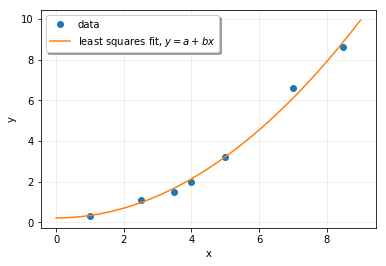

In [34]:
# least square solution with M2
p, res, rnk, s = lstsq(M2, y)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx^2
plt.plot(xx, yy, label='least squares fit, $y = a + bx$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

# Multivariate Regression
## is just as simple - except we have more than one covariate

...

### Fitting a 3rd Order Polynomial is Multiple Linear Regresssion
Suppose we want to fit a degree-3 polynomial of the form $y = \beta_0 + \beta_1 x + \beta_2 x^2+ \beta_3 x^3$ to the same data. 
Then we first form the design matrix `M3`, with a constant column of `1`s with `x^0` and three additional columns containing `x^1`, `x^2` and `x^3` as follows:

In [41]:
# Fitting a cubic polynolial is the same idea
M3 = x[:, np.newaxis]^[0, 1, 2, 3]
M3

array([[   1.   ,    1.   ,    1.   ,    1.   ],
       [   1.   ,    2.5  ,    6.25 ,   15.625],
       [   1.   ,    3.5  ,   12.25 ,   42.875],
       [   1.   ,    4.   ,   16.   ,   64.   ],
       [   1.   ,    5.   ,   25.   ,  125.   ],
       [   1.   ,    7.   ,   49.   ,  343.   ],
       [   1.   ,    8.5  ,   72.25 ,  614.125]])

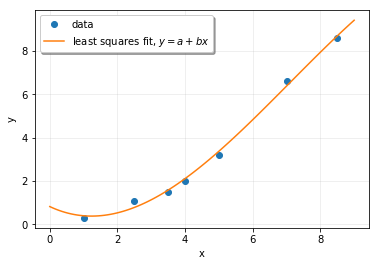

In [42]:
p, res, rnk, s = lstsq(M3, y)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx + p[2]*xx^2 + p[3]*xx^3
plt.plot(xx, yy, label='least squares fit, $y = a + bx$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

# Sample Exam Problem 8

Using the `lstsq` method shown above, and data arrays `x` and `y` in the next cell that contain log light intensity and log surface temperature in a give range of measurements from nearby stars, compute the least squares estimates of $\beta_0$ and $\beta_1$ under the simple linear regression model with an intercept and a slope term. Make a plot similar to the one above with the data points and the fitted regression line.

In [ ]:
# Sample Exam Problem 8 
# do not change this import and data block ########################
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import numpy as np
logLightIntens_logSurfTemp=[(4.37,5.23),(4.56,5.74),
(4.26,4.93),(4.56,5.74),(4.30,5.19),(4.46,5.46),(3.84,4.65),(4.57,5.27),(4.26,5.57),(4.37,5.12),(3.49,5.73),
(4.43,5.45),(4.48,5.42),(4.01,4.05),(4.29,4.26),(4.42,4.58),(4.23,3.94),(4.42,4.18),(4.23,4.18),(3.49,5.89),
(4.29,4.38),(4.29,4.22),(4.42,4.42),(4.49,4.85),(4.38,5.02),(4.42,4.66),(4.29,4.66),(4.38,4.90),(4.22,4.39),
(3.48,6.05),(4.38,4.42),(4.56,5.10),(4.45,5.22),(3.49,6.29),(4.23,4.34),(4.62,5.62),(4.53,5.10),(4.45,5.22),
(4.53,5.18),(4.43,5.57),(4.38,4.62),(4.45,5.06),(4.50,5.34),(4.45,5.34),(4.55,5.54),(4.45,4.98),(4.42,4.50)]
CleanedlogLightIntens_logSurfTemp=\
np.array([yx for yx in logLightIntens_logSurfTemp if yx[1]<5.9 and yx[0]>4]) # data range constraint
x=CleanedlogLightIntens_logSurfTemp[:,1]
y=CleanedlogLightIntens_logSurfTemp[:,0]
########### end of import and data block ##########################

# Replace only ZZZ by the right values
M1 = ZZZ # design matrix M1
b, res, rnk, s = lstsq(ZZZ,ZZZ)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(ZZZ, ZZZ, 101)
yy = ZZZ *xx
plt.plot(xx, yy, label='least squares fit')
plt.xlabel('log light intensity (X)')
plt.ylabel('log surface temperature (Y)')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.text(4, 4.7, r'$\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x, \quad \
\widehat{\beta}_0 = $ %(b0)0.3f , $\widehat{\beta}_1 = $ %(b1)0.3f' % {'b0': b[0], 'b1': b[1]} )
plt.show()

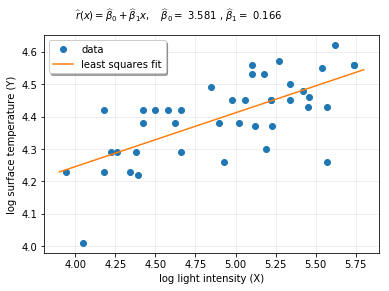

In [124]:
# Sample Exam Problem 8 Solution
logLightIntens_logSurfTemp=[(4.37,5.23),(4.56,5.74),
(4.26,4.93),(4.56,5.74),(4.30,5.19),(4.46,5.46),(3.84,4.65),(4.57,5.27),(4.26,5.57),(4.37,5.12),(3.49,5.73),
(4.43,5.45),(4.48,5.42),(4.01,4.05),(4.29,4.26),(4.42,4.58),(4.23,3.94),(4.42,4.18),(4.23,4.18),(3.49,5.89),
(4.29,4.38),(4.29,4.22),(4.42,4.42),(4.49,4.85),(4.38,5.02),(4.42,4.66),(4.29,4.66),(4.38,4.90),(4.22,4.39),
(3.48,6.05),(4.38,4.42),(4.56,5.10),(4.45,5.22),(3.49,6.29),(4.23,4.34),(4.62,5.62),(4.53,5.10),(4.45,5.22),
(4.53,5.18),(4.43,5.57),(4.38,4.62),(4.45,5.06),(4.50,5.34),(4.45,5.34),(4.55,5.54),(4.45,4.98),(4.42,4.50)]
CleanedlogLightIntens_logSurfTemp=\
np.array([yx for yx in logLightIntens_logSurfTemp if yx[1]<5.9 and yx[0]>4]) # data range constraint
x=CleanedlogLightIntens_logSurfTemp[:,1]
y=CleanedlogLightIntens_logSurfTemp[:,0]

from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import numpy as np
M1 = x[:, np.newaxis]^[0, 1]
b, res, rnk, s = lstsq(M1, y)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(3.9, 5.8, 101)
yy = b[0] + b[1]*xx
plt.plot(xx, yy, label='least squares fit')
plt.xlabel('log light intensity (X)')
plt.ylabel('log surface temperature (Y)')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.text(4, 4.7, r'$\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x, \quad \
\widehat{\beta}_0 = $ %(b0)0.3f , $\widehat{\beta}_1 = $ %(b1)0.3f' % {'b0': b[0], 'b1': b[1]} )
plt.show()

---
## Assignment 3, PROBLEM 8
Maximum Points = 2


For the fitted regression model in the next cell get the residuals and plot them against the covariate. 
How do the residuals compare to a Normal random variable centred at $0$ with a constant variance (summarise in a sentence or two by double-clicking this cell and writing in between the two lines `---` below)?

---

---

In [ ]:
logLightIntens_logSurfTemp=[(4.37,5.23),(4.56,5.74),
(4.26,4.93),(4.56,5.74),(4.30,5.19),(4.46,5.46),(3.84,4.65),(4.57,5.27),(4.26,5.57),(4.37,5.12),(3.49,5.73),
(4.43,5.45),(4.48,5.42),(4.01,4.05),(4.29,4.26),(4.42,4.58),(4.23,3.94),(4.42,4.18),(4.23,4.18),(3.49,5.89),
(4.29,4.38),(4.29,4.22),(4.42,4.42),(4.49,4.85),(4.38,5.02),(4.42,4.66),(4.29,4.66),(4.38,4.90),(4.22,4.39),
(3.48,6.05),(4.38,4.42),(4.56,5.10),(4.45,5.22),(3.49,6.29),(4.23,4.34),(4.62,5.62),(4.53,5.10),(4.45,5.22),
(4.53,5.18),(4.43,5.57),(4.38,4.62),(4.45,5.06),(4.50,5.34),(4.45,5.34),(4.55,5.54),(4.45,4.98),(4.42,4.50)]
CleanedlogLightIntens_logSurfTemp=\
np.array([yx for yx in logLightIntens_logSurfTemp if yx[1]<5.9 and yx[0]>4]) # data range constraint
x=CleanedlogLightIntens_logSurfTemp[:,1]
y=CleanedlogLightIntens_logSurfTemp[:,0]

from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import numpy as np
M1 = x[:, np.newaxis]^[0, 1]
b, res, rnk, s = lstsq(M1, y)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(3.9, 5.8, 101)
yy = b[0] + b[1]*xx
plt.plot(xx, yy, label='least squares fit')
plt.xlabel('log light intensity (X)')
plt.ylabel('log surface temperature (Y)')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.text(4, 4.7, r'$\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x, \quad \
\widehat{\beta}_0 = $ %(b0)0.3f , $\widehat{\beta}_1 = $ %(b1)0.3f' % {'b0': b[0], 'b1': b[1]} )
plt.show()

# Obtain the residuals and plot them (summarise in the markdown cell above)
XXX
XXX
XXX

# Least Squares and Maximum Likelihood

...

# Prediction

...

# Multiple Regression Examples

...

## Loss functions and gradient descent

In the above example with linear regression we wanted to minimize the vertical distance between the fitted line and the data, this vertical distance is a prime example of a **loss function**. In general when we are faced with a regression problem we want a way of measure how good our model is, this quantity that we want to *minimise* is called the loss function and its expectation (over different sample data-points is called the **risk**). The mathematical statistical justification for this approach towards minimising expected loss or risk is called [empirical risk minimisation](https://en.wikipedia.org/wiki/Empirical_risk_minimization), as we will see in the sequel in more detail.

Let us circle back to linear regression once again. The way the `np.argmin` method searched for the minimum of:

$$L(a,b) = \sum_{i=1}^N (y_i - f_{a,b}(x_i))^2$$

was by simply evaluating $L(a,b)$ for each value of $a$ in the array `prop_a` with our guessed values for $a$ and picking the $a$ that minimised $L(a,b)$. Recall we fixed $b$ in the search.

> np.argmin? # see the docstring for np.argmin and other functions/methods we are using throughout if you need to know right away.

This approaching of evaluating the loss at a set of parameter values quickly becomes infeasible when the dimension of the problem is larger than $1$. 

Even if we just have two guess for each dimension of the parameter space with $d$ dimensions, then we will need to evaluate the loss at $2^d$ parameter values. When $d=10,100,1000$ the number of evaluation points become $1024$, $1.268e30, 1.072e301$, respectively.

Often in big-data settings, the number of dimensions for the regression problem can easily extend over a few thousands. 
Thus, we need a systematic way to find the optimal parameters, i.e., the parameters that minimise the loss function.

The iterative solution is called **gradient descent** and it goes like this: 

- *Initialise:* Let us start with some initial parameters, say in our linear regression example $(a,b) = (0,0)$, say at iteration $i=0$.
- *Update:* then we construct an update rule like the following to update the parameter values at $i+1$ from those at iteration $i$:
  - $a_i = a_{i-1}-l \frac{dL}{da}(a_{i-1},b_{i-1})$
  - $b_i = b_{i-1}-l \frac{dL}{db}(a_{i-1},b_{i-1}) $
  - where $l > 0$ is called the learning rate.
- *Stop:* Finally we stop when a stopping rule like the following is satisfied:
$$\sqrt( ( L(a_{i+1},b_{i+1})- L(a_{i},b_{i}))^2) < \tau, \qquad \text{ where, $\tau$ is some tolerance threshold that says we are close enough to the minimum value found by our iteration}.$$


# Introduction to R in SageMath Jupyter IPython Notebook

1. How to run `R` commands in SageMath
    * installing packages
    * loading libraries
    * loading data
    * running typical statistical models like generalised linear models (a superset of linear regression models in this course) on the beetles data
    * making PNG images of the plots
    
2. Why SageMath for `R`?

## Running R in SageMath is "easy as":

- Use `%%r` to denote that the `Code` cell is of language `R`
- Installing R packages with `install.packages(...)`

**Note:** Once a package is installed on a particular machine using `install.packages("wantedpackage")` then you only need to load that library using `library(wantedpackage)` when you are using the same machine.


In [40]:
%%r
#install.packages("Flury")
#library(Flury)
#data(dead.beetles)

## Additional Packages

One often needs several additional packages to run certain desired `R` commands. Let's get some such packages.


In other words, you don't have to install packages that are already installed and thus can be automatically found by `R` in the default location it will be installed at. In the case below, you can see where the package was installed from the following line:

-  `Installing package into ‘/some_path_to_where_the_package_is_installed’`